In [2]:
import os
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
import matplotlib.pyplot as plt

In [7]:
def load(f, label):
    # load the file into tensor
    image = tf.io.read_file(f)
    # Decode it to JPEG format
    image = tf.image.decode_jpeg(image)
    # Convert it to tf.float32
    image = tf.cast(image, tf.float32)
    
    return image, label

In [11]:
image_path = 'dog.jpg.jpeg'
image, label = load(image_path, 0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


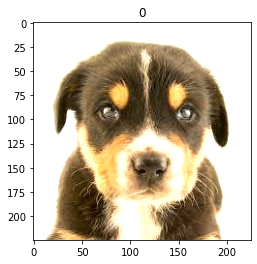

In [20]:
image, label = load('dog.jpg.jpeg', 0)

fig, ax = plt.subplots()
ax.imshow(image /200.)
ax.set_title(label)
plt.show()

In [16]:
def resize(input_image, size):
    return tf.image.resize(input_image, size)

In [18]:
def random_crop(input_image):
    return tf.image.random_crop(input_image, size=[100, 100, 3])

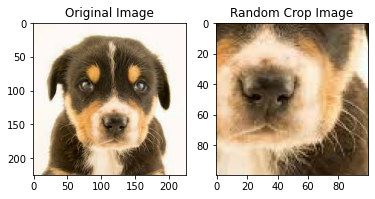

In [19]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image / 255.)
ax[0].set_title("Original Image")

ax[1].imshow(random_crop(image) / 255.)
ax[1].set_title("Random Crop Image")
plt.show()